# TP 2 fouille de données : Titanic
    Mathilde Blandel & Léa Mercier
    Groupe 1 & Groupe 2 FD


L'objectif de ce tp est de développer des techniques de DataMining avec lesquelles nous essayerons de prévoir si un individu survivra ou non au naufrage du Titanic. Pour cela, nous disposons d'un set de données sur des survivants à partir duquel nous allons travailler.

## Data exploration, insfrastructure and statistics

Le but de cette partie est se familiariser avec l'utilisation de la librairie Pandas. Elle permet de charger des bases de données et de manipuler les données.

In [1]:
import pandas as pd

### Import dataset

In [2]:
data_train = pd.read_csv('train.csv', sep =',')

### Read all lines of a dataframe

La librarie a définie un nombre de lignes qui peuvent être affichées qui peuvent être visualisé. Pour le changer, il faut modifier le nombre par défaut dans les options. Nous pouvons donc maintenant voir l'intégralité des données et nous pouvons par la même occasion remarquer que des données sont absentes.

In [3]:
pd.set_option('display.max_rows', data_train.shape[0]+1)

In [4]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [5]:
#remettre le nombre max de lignes par défaut
#pd.set_option('display.max_rows', 10) 

### Just first few lines

Pour afficher uniquement les n premières lignes d'une table, on utilise la commande : *head(n)*

In [6]:
data_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### Dataset size and data types

Nous pouvons remarquer que tous les données de notre dataset ne sont pas du même type. On retrouve des int64 pour les nombres entiers, object pour les chaînes de caractères et des floats64 pour les nombres décimaux. 

Le dataset a 891 entrées/lignes et 12 colonnes.

In [7]:
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### Overall chance of survival

Nous voulons maintenant calculer la probabilité qu'une personne survive indépendamment de ses caractérisques (âge, sexe, etc). Pour cela, on utilise la formule :
```
Probabilité de survivre = nombre de survivants / nombre de morts
```
Pour cela, on commence par faire un test d'égalité sur chaque ligne pour savoir si l'individu a survécu. On obtient alors une table de dimension 1x891 avec pour valeur True si la condition est vérifiée sinon False. On compte ensuite le nombre de True avec la fonction *sum()*.

In [8]:
survive = data_train['Survived']==1
total = data_train.shape[0]
print("La probabilité de survivre est de : " , round(survive.sum()/total,2))

La probabilité de survivre est de :  0.38


### Number and purcentage of survivors

Nous voulons cette fois-ci connaitre le pourcentage et le nombre de survivant en fonction de leurs caractérisques : âge, sexe et classe sur le bateau.

In [9]:
male = data_train.Sex == 'male'
child = data_train.Age < 12
adult = data_train.Age > 18
class1 = data_train.Pclass == 1
class2 = data_train.Pclass == 2

In [10]:
df = pd.DataFrame(columns=['Type','Number', 'Purcentage'])

In [11]:

new_row = {'Type':'Female', 'Number':data_train[~male & survive].shape[0], 'Purcentage':round(data_train[~male & survive].shape[0]/total*100,2)}
#append row to the dataframe
df = df.append(new_row, ignore_index=True)

new_row = {'Type':'Male', 'Number':data_train[male & survive].shape[0], 'Purcentage':round(data_train[male & survive].shape[0]/total*100,2)}
df = df.append(new_row, ignore_index=True)

new_row = {'Type':'Children', 'Number':data_train[child & survive].shape[0], 'Purcentage':round(data_train[child & survive].shape[0]/total*100,2)}
df = df.append(new_row, ignore_index=True)

new_row = {'Type':'Adolescent', 'Number':data_train[~child & ~adult & survive].shape[0], 'Purcentage':round(data_train[~child & ~adult & survive].shape[0]/total*100,2)}
df = df.append(new_row, ignore_index=True)

new_row = {'Type':'Adult', 'Number':data_train[adult & survive].shape[0], 'Purcentage':round(data_train[adult & survive].shape[0]/total*100,2)}
df = df.append(new_row, ignore_index=True)

new_row = {'Type':'1st class', 'Number':data_train[class1 & survive].shape[0], 'Purcentage':round(data_train[class1 & survive].shape[0]/total*100,2)}
df = df.append(new_row, ignore_index=True)

new_row = {'Type':'2nd class', 'Number':data_train[class2 & survive].shape[0], 'Purcentage':round(data_train[class2 & survive].shape[0]/total*100,2)}
df = df.append(new_row, ignore_index=True)

new_row = {'Type':'3rd class', 'Number':data_train[~class1 & ~class2 & survive].shape[0], 'Purcentage':round(data_train[~class1 & ~class2 & survive].shape[0]/total*100,2)}
df = df.append(new_row, ignore_index=True)


In [12]:
df


,Type,Number,Purcentage
0,Female,233,26.15
1,Male,109,12.23
2,Children,39,4.38
3,Adolescent,83,9.32
4,Adult,220,24.69
5,1st class,136,15.26
6,2nd class,87,9.76
7,3rd class,119,13.36


### Simple queries

Nous voulons maintenant faire des requêtes pour connaitre par exemple le nombre de survivants parmi les enfants de moins de 5 ans. Il nous faut pour cela modifier la valeur du test.

In [13]:
print("Le nombre de survivants chez les - de 5 ans : ", (data_train.Age < 5).sum())

Le nombre de survivants chez les - de 5 ans :  40


### Missing values statistic

Nous avons vu un peu plus tôt qu'il manque des valeurs dans notre dataset. Nous voulons donc créer des statisques dessus. Nous pouvons remarquer que les données manquantes ne concernent que 3 colonnes : âge, cabine et embarquement. Les données sur l'âge sont les plus problématiques car elles nous serons utiles par la suite pour la prédiction alors que les autres sont plutôt anodines.

In [14]:
data_null = data_train.isna().sum()
total_null = data_null.sum()

In [15]:
#crée le dataframe
df = pd.DataFrame(columns=['Type','Number', 'Purcentage'])
#remplit le dataframe
for i in range(data_null.shape[0]) :
    new_row = {'Type':data_train.columns[i], 'Number':data_null[i], 'Purcentage':round(data_null[i]/total_null*100,2)}
    df = df.append(new_row, ignore_index=True)

In [16]:
df

,Type,Number,Purcentage
0,PassengerId,0,0.00
1,Survived,0,0.00
2,Pclass,0,0.00
3,Name,0,0.00
4,Sex,0,0.00
5,Age,177,20.44
6,SibSp,0,0.00
7,Parch,0,0.00
8,Ticket,0,0.00
9,Fare,0,0.00


# Features selection and Classification

Nous voulons maintenant exploiter les données et construire un classifier sur un sous-ensemble de données, pour pouvoir essayer de prédire la survie de nos sujets.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
#Visualisation
import pydotplus
from IPython.display import Image

### Create data_train 

Pour survivre au naufrage du Titanic les informations les plus importants sont l'âge, le genre, la classe de notre billet et si la personne a survécu. Nous allons donc créer un sous-ensemble ne contenant que ces 4 colonnes qui sera notre nouvelle base de départ.

Nous allons également transformer la colonne du genre, car pour pouvoir les évaluer, nouos avons besoin que les données soient des nombres. A partir de maintenant les hommes seront désignés par le chiffre 1 et les femmes par le 0.

Concernant les valeurs null dans la table, nous supprimons purement et simplement les lignes en contenant.

In [18]:
data_sexe = data_train['Sex'] == 'male'
data_sexe = data_sexe.astype(int)

In [19]:
data_train_select = data_train[['Survived','Pclass','Age']]
data_train_select = data_train_select.assign(Sex = data_sexe)
data_train_select.dropna(inplace=True)
data_train_select.reset_index(drop=True, inplace=True)

In [20]:
data_train_select

,Survived,Pclass,Age,Sex
0,0,3,22.00,1
1,1,1,38.00,0
2,1,3,26.00,0
3,1,1,35.00,0
4,0,3,35.00,1
5,0,1,54.00,1
6,0,3,2.00,1
7,1,3,27.00,0
8,1,2,14.00,0
9,1,3,4.00,0


### Decision tree

Pour pouvoir créer notre arbre de décision, nous commençons par diviser les données en 2 parties. La colonne 'Survived' sera l'information a deviner et les 3 autres les critères.  

In [21]:
X = data_train_select.values[:, 1:4]
Y = data_train_select.values[:,0]

Tester notre model sur les données avec lesquels nous l'avons entrainé est une mauvaise méthode, car on réussirait toujours à prédire les résultats. Nous divisons donc les données une seconde fois, le sous-ensemble X_train sera utilisé pour entrainer notre arbre de décision et le sous-ensemble X_test (40% des données) sera utilisé plus tard pour pouvoir le tester.

In [22]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size= 0.4, random_state = 100)


clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth=3, min_samples_leaf=4)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=4)

Nous pouvons maintenant utiliser notre model pour prédire des données. Pour pouvoir calculer la précision de notre model, nous l'utilisons sur notre jeu de données que nous avions mis de côté, et nous comparons le résultat attendu avec notre résultat. 

In [23]:
clf_gini.predict([[2, 0.7,0]])

array([1.])

In [24]:
y_pred = clf_gini.predict(X_test)
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  76.57342657342657


### Parameters of the Decision treee clasifier

Nous faisons varier les paramètres **criterion**, **max_depth**, **min_samples_leaf** et **splitter** de notre DTC et nous remarquons que :
- Lorsque nous augmentons max_depth, notre model devient plus complexe et colle mieux à la réalité. Nous avons donc une augmentation de la précision en augmentent de ce paramètre jusqu'à atteindre une limite.
- Pour ce set de données, gini offre une meilleure précision que entropy
- splitter correspond à la stratégie choisit pour diviser les nodes. La stratégie par défaut est "best" et choisit la meilleur division. "random" de son côté, choisit la meilleur division aléatoire. Globalement "best" devient meilleur quand max_depth augmente
- La précision diminue quand min_samples_leaf augmente car 

In [25]:
import numpy as np
import matplotlib.pyplot as plt

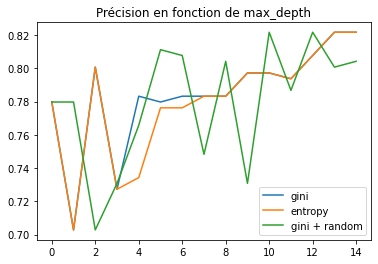

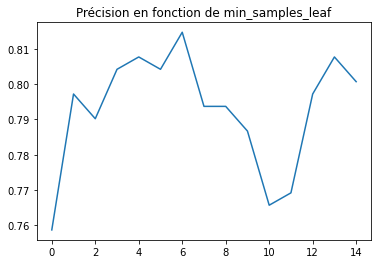

In [26]:
x = range(15)
y = np.zeros(15)
y2 = np.zeros(15)
y3 = np.zeros(15)
for i in range(15) :
    clf_gini2 = DecisionTreeClassifier(criterion = "gini",max_depth=i+1, min_samples_leaf=2)
    clf_gini2.fit(X_train, y_train)
    y_pred2 = clf_gini2.predict(X_test)
    y[i] = accuracy_score(y_test,y_pred2)
    
    clf_2 = DecisionTreeClassifier(criterion = "entropy", max_depth=i+1, min_samples_leaf=2)
    clf_2.fit(X_train, y_train)
    y_pred_2 = clf_2.predict(X_test)
    y2[i] = accuracy_score(y_test,y_pred_2)
    
    clf_3 = DecisionTreeClassifier(criterion = "gini", splitter = "random",  max_depth=i+1, min_samples_leaf=2)
    clf_3.fit(X_train, y_train)
    y_pred_3 = clf_3.predict(X_test)
    y3[i] = accuracy_score(y_test,y_pred_3)

plt.title("Précision en fonction de max_depth")
plt.plot(x, y , label="gini")
plt.plot(x, y2 ,label="entropy" )
plt.plot(x, y3 ,label="gini + random")
plt.legend()
plt.show()

for i in range(15) :
    clf_gini2 = DecisionTreeClassifier(criterion = "gini", max_depth=10, min_samples_leaf=i+1)
    clf_gini2.fit(X_train, y_train)
    y_pred2 = clf_gini2.predict(X_test)
    y[i] = accuracy_score(y_test,y_pred2)

plt.title("Précision en fonction de min_samples_leaf")
plt.plot(x, y)
plt.show()



### Visualisation

Pour visualiser notre arbre de décision et pouvoir le lire plus facilement, nous allons utiliser **pydotplus**. Cette librairie n'est pas inclue de base et doit être préalablement installer :
```
import sys
!conda install --yes --prefix {sys.prefix} pydotplus
```

In [27]:
import collections

In [28]:
dot_data = tree.export_graphviz(clf_gini,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)


colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

True

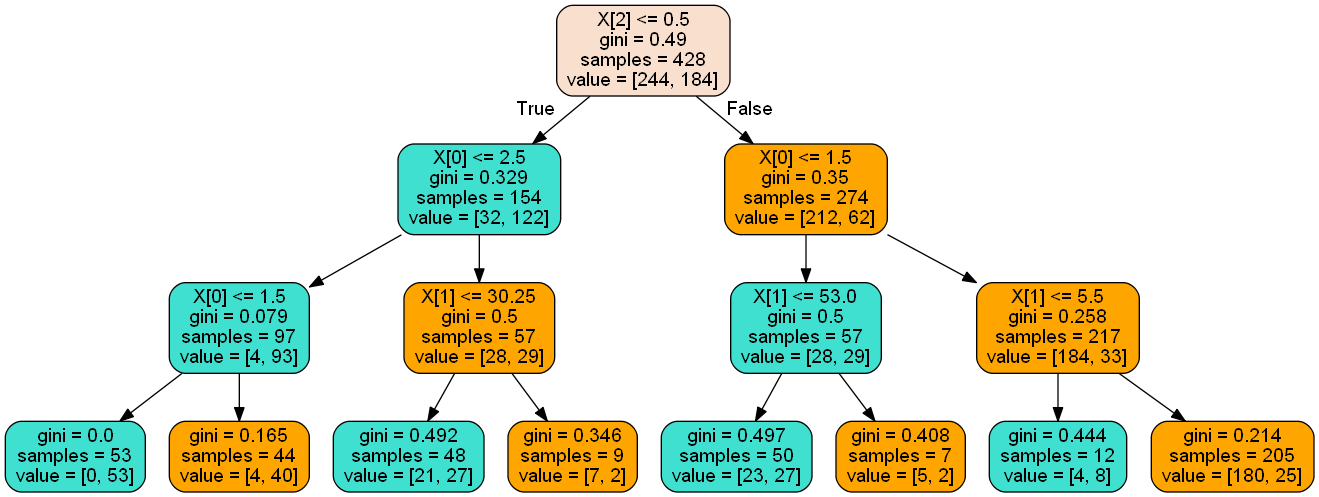

In [29]:
Image("tree.png")

Sur chaque node, nous pouvons voir :
- la règle qui a été utilisé
- samples : le nombre d'individus 
- value [nb morts / nb survivants] dans notre population

La première node correspond au genre des individus, on va à ce stade séparer les hommes (1>0.5)qui seront à droite (False) et les femmes à gauche (True). Quand nous descendons à gauche, nous pouvons voir qu'il a au total 130 femmes et combien d'entre elles sont mortes ou ont survécu. On pendant alors un nouveau critère : la classe du billet, et la nouvelle règle qui sépare les 1ère classes des 2eme et 3eme classes. On continue ainsi jusqu'à arriver aux feuilles.

Ces règles ont été apprises par l'arbre de décision pendant l'entrainement. Les règles de classifications au sommet sont les plus significatives

## Pliage en k 

Plus tôt nous avions choisi de diviser le set de données en deux sous-ensemble. Dans la technique de validation croisée, les données sont divisées en k morceaux, k-1 serviront pour l'entrainement du model et le dernier servira pour le test. 

Pour mesurer la performance de cette technique, nous ferons la moyenne des performance calculées dans la boucle.

In [30]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [31]:
#crée le dataframe
df_acc = pd.DataFrame(columns=['DTC','LR', 'GNB','RFC'])
df_sco = pd.DataFrame(columns=['DTC','LR', 'GNB','RFC'])

# prepare the cross-validation procedure
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    # create model
    model_DTC = DecisionTreeClassifier()
    model_LR = LogisticRegression()
    model_GNB = GaussianNB()
    model_RFC = RandomForestClassifier()
    
    model_DTC.fit(X_train, y_train)
    model_LR.fit(X_train, y_train)
    model_GNB.fit(X_train, y_train)
    model_RFC.fit(X_train, y_train)
    
    # predict the result
    y_pred_DTC = model_DTC.predict(X_test)
    y_pred_LR = model_LR.predict(X_test)
    y_pred_GNB = model_GNB.predict(X_test)
    y_pred_RFC = model_RFC.predict(X_test)
        
    #fill dataframe
    new_row = {'GNB':accuracy_score(y_test,y_pred_GNB)*100, 'DTC':accuracy_score(y_test,y_pred_DTC)*100,
               'LR':accuracy_score(y_test,y_pred_LR)*100,'RFC':accuracy_score(y_test,y_pred_RFC)*100}
    df_acc = df_acc.append(new_row, ignore_index=True)
    
    

In [32]:
print(df_acc)
print("\nPrécision moyenne de DTC :" ,df_acc['DTC'].mean())
print("Précision moyenne de LR :" ,df_acc['LR'].mean())
print("Précision moyenne de GNB :" ,df_acc['GNB'].mean())
print("Précision moyenne de RFC :" ,df_acc['RFC'].mean())

         DTC         LR        GNB        RFC
0  79.166667  79.166667  81.944444  76.388889
1  81.944444  79.166667  79.166667  80.555556
2  80.555556  77.777778  76.388889  81.944444
3  80.555556  80.555556  83.333333  77.777778
4  90.140845  78.873239  77.464789  87.323944
5  80.281690  77.464789  77.464789  80.281690
6  77.464789  74.647887  71.830986  80.281690
7  84.507042  78.873239  74.647887  83.098592
8  83.098592  80.281690  78.873239  83.098592
9  84.507042  80.281690  80.281690  84.507042

Précision moyenne de DTC : 82.22222222222221
Précision moyenne de LR : 78.70892018779341
Précision moyenne de GNB : 78.13967136150234
Précision moyenne de RFC : 81.52582159624413


## Pistes pour améliorer la précision

### Valeurs manquantes
La précision de LR dépends de la quantité de donnée donc on pourrait essayer d'augmenter la quantité de donnée en utilisant les lignes avec des valeurs manquantes. Nous remplaçons donc les valeurs manquantes par l'âge moyen et nous recommençons les tests. Nous remarquons alors que la précision de LR et GNB a augmenté mais celle de DTC et RFC a diminué.

### Trouver de nouvelles règles

Nous décidons de rajouter Embarked en remarquant que selon le port dans lequel les passagers embarquent les chances de survivre sont différentes.

# Classify the test set

Cette fois-ci, nous allons utiliser la totalité des données pour entraîner le model *LogisticRegression* et un autre jeu de données pour les tests. Comme nous devons prédire les résultats pour tous les passagers, nous avons décidé de garder la méthode de remplir les données manquantes avec la valeur moyenne. A ce stade, nous remarquons que la précision est basse et nous décidons de rajouter Embarked.

In [33]:
#Read data
data_train = pd.read_csv('train.csv', sep =',')
data_test = pd.read_csv('test.csv', sep =',')
data_gender = pd.read_csv('gender_submission.csv', sep =',')

# DATA TRAIN
data_sexe = data_train['Sex'] == 'male'
data_sexe = data_sexe.astype(int)

data_Q = data_train['Embarked'] == 'Q'
data_Q = data_Q.astype(int)

data_C = data_train['Embarked'] == 'C'
data_C = data_C.astype(int)

data_S = data_train['Embarked'] == 'S'
data_S = data_S.astype(int)


data_train = data_train[['Survived','Pclass','Age']]
data_train = data_train.assign(Sex = data_sexe)
data_train = data_train.assign(EmbarkedS = data_S)
data_train = data_train.assign(EmbarkedC = data_C)
data_train = data_train.assign(EmbarkedQ = data_Q)

age_moy = round(data_train.Age.mean(),1)
data_train = data_train.fillna(age_moy)

X_train = data_train.values[:, 1:7]
Y_train = data_train.values[:,0]

# MODEL
model = LogisticRegression()
model.fit(X_train, Y_train)

# DATA TEST
data_sexe = data_test['Sex'] == 'male'
data_sexe = data_sexe.astype(int)

data_Q = data_test['Embarked'] == 'Q'
data_Q = data_Q.astype(int)

data_C = data_test['Embarked'] == 'C'
data_C = data_C.astype(int)

data_S = data_test['Embarked'] == 'S'
data_S = data_S.astype(int)

data_test = data_test[['Pclass','Age']]
data_test = data_test.assign(Sex = data_sexe)
data_test = data_test.assign(EmbarkedS = data_S)
data_test = data_test.assign(EmbarkedC = data_C)
data_test = data_test.assign(EmbarkedQ = data_Q)

age_moy = round(data_train.Age.mean(),1)
data_test = data_test.fillna(age_moy)

y_pred = model.predict(data_test)

y_test = data_gender[['Survived']]
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

out = data_gender[['PassengerId']]
out = out.assign(Survived = y_pred)

out.to_csv('out.csv', index=False ) 

Accuracy is  94.25837320574163
